# Árvore de Decisão

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import plotly

# Modelo Árvore de Decisão

In [6]:
from sklearn.tree import DecisionTreeClassifier

## Base risco de crédito

In [3]:
df_risco = pd.read_csv('risco_credito.csv')
print(df_risco.shape)
df_risco.head()

(14, 5)


,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo


In [7]:
print(df_risco.info())
df_risco.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   historia   14 non-null     object
 1   divida     14 non-null     object
 2   garantias  14 non-null     object
 3   renda      14 non-null     object
 4   risco      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes
None


,historia,divida,garantias,renda,risco
count,14,14,14,14,14
unique,3,2,2,3,3
top,boa,alta,nenhuma,acima_35,alto
freq,5,7,11,7,6


## Pré-processamento

In [8]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
    X_risco, y_risco = pickle.load(f)

In [10]:
print(X_risco.shape)
print(y_risco.shape)

(14, 4)
(14,)


## Treinamento

In [11]:
arvore_risco = DecisionTreeClassifier(criterion='entropy')
arvore_risco.fit(X_risco, y_risco)

DecisionTreeClassifier(criterion='entropy')

In [14]:
print(df_risco.columns[0:4])
arvore_risco.feature_importances_

Index(['historia', 'divida', 'garantias', 'renda'], dtype='object')


array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

## Visualização

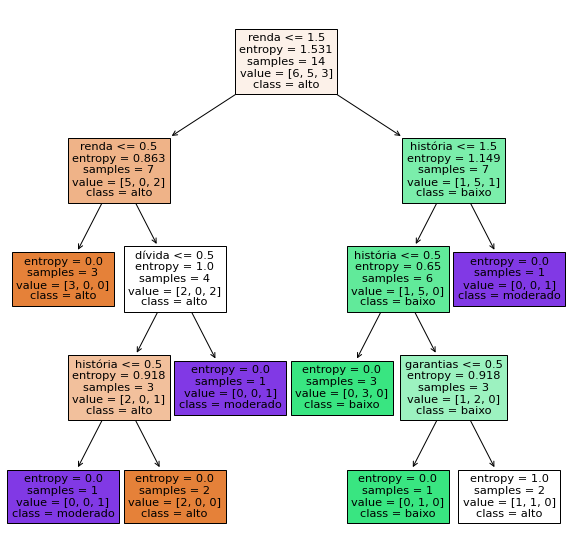

In [22]:
from sklearn import tree
previsores = ['história', 'dívida','garantias', 'renda']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,10])
tree.plot_tree(arvore_risco, feature_names=previsores, class_names=arvore_risco.classes_, filled=True);

Testando registros:
- História: Boa (0)
- Dívida: Alta (0)
- Garantias: Nenhuma (1)
- Renda > 35 (2)

e

- História: Ruim (2)
- Dívida: Alta (0)
- Garantias: Adequada (0)
- Renda < 15 (0)

In [25]:
previsoes = arvore_risco.predict([[0,0,1,2], [2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)